In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import HalvingRandomSearchCV,RandomizedSearchCV
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import calendar

In [3]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [4]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
print(test.shape),print(train.shape)

(555719, 23)
(1296675, 23)


(None, None)

In [6]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

In [9]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [10]:
test.trans_date.head(),test.dob.head(),train.trans_date.head(),train.dob.head()

(0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns],
 0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns])

In [11]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               object        
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    datetime64[ns]
 18  trans_num              obje

In [12]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1852394, dtype: object

In [13]:
totalcat=total.select_dtypes(include=['object'])

In [14]:
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,fraud_Kirlin and Sons,personal_care,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,F
1,fraud_Sporer-Keebler,personal_care,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,F
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,F
3,fraud_Haley Group,misc_pos,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,Set designer,2159175b9efe66dc301f149d3d5abf8c,F
4,fraud_Johnston-Casper,travel,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,Furniture designer,57ff021bd3f328f8738bb535c302a31b,F
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,F
1296671,fraud_Abernathy and Sons,food_dining,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,F
1296672,fraud_Stiedemann Ltd,food_dining,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,F


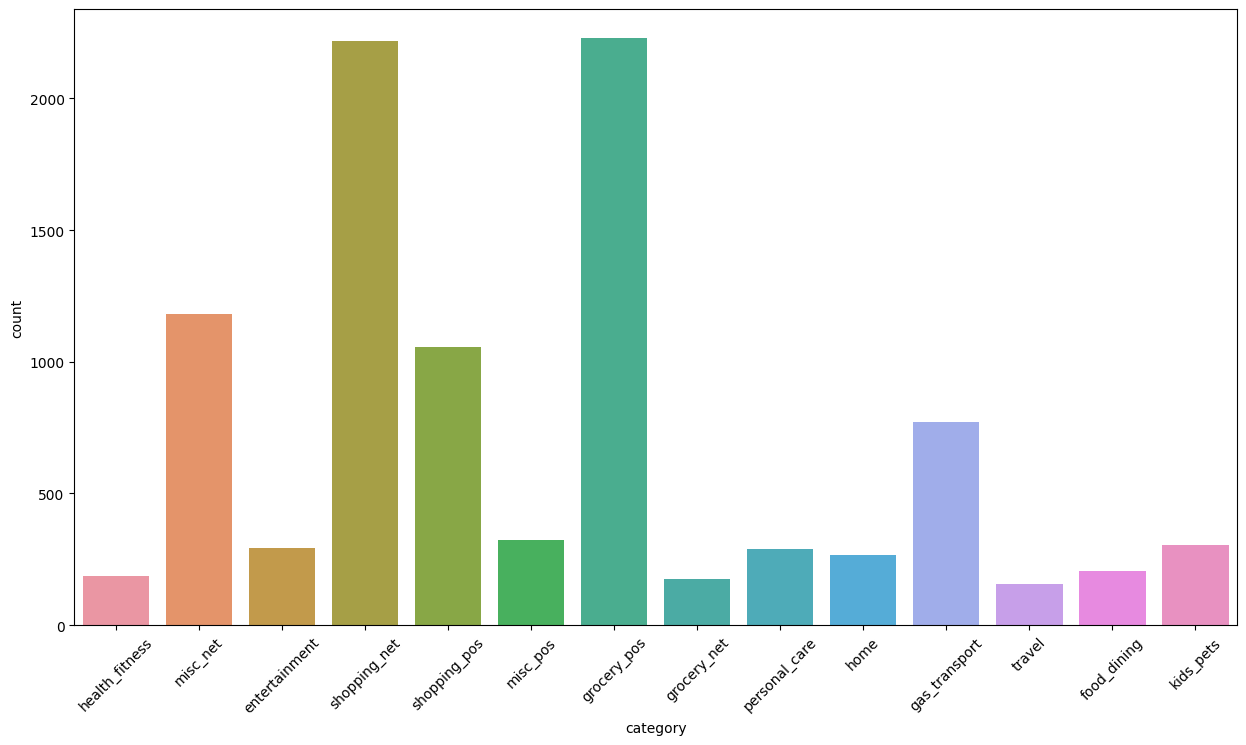

In [15]:
fraud_data = total[total['is_fraud_cat'] == "T"]
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=fraud_data, x='category')
plt.xticks(rotation=45)
plt.show()

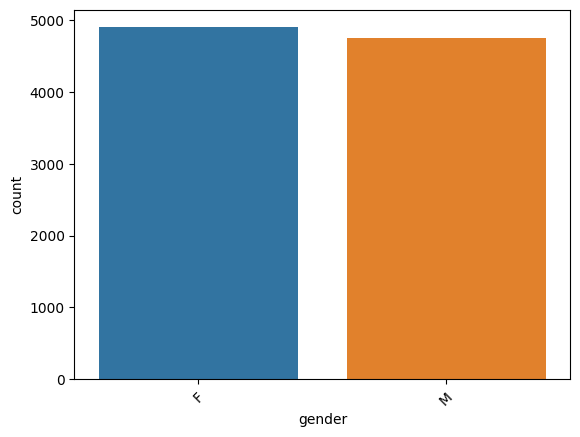

In [16]:
fraud_data = total[total['is_fraud_cat'] == "T"]
sns.countplot(data=fraud_data, x='gender')
plt.xticks(rotation=45)
plt.show()

In [17]:
fig, ax = plt.subplots(figsize=(140,65))
plt.rcParams.update({'font.size': 60})
sns.countplot(data=total[total['is_fraud_cat']=="T"],x='state')
plt.xticks(rotation=45)
for p, label in zip(ax.patches, total["state"].value_counts().index):
    ax.annotate(label, (p.get_x()+0.2, p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

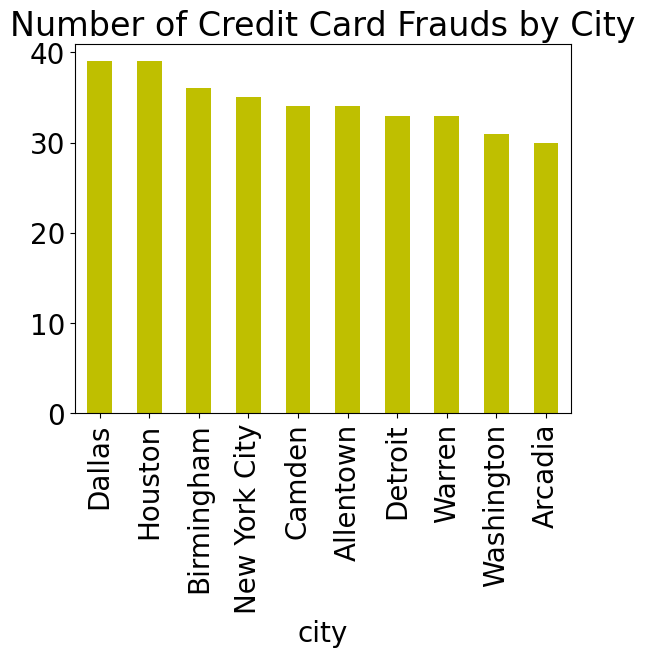

In [18]:
plt.rcParams.update({'font.size': 20})
total[total['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color='y')
plt.title("Number of Credit Card Frauds by City")
plt.show()

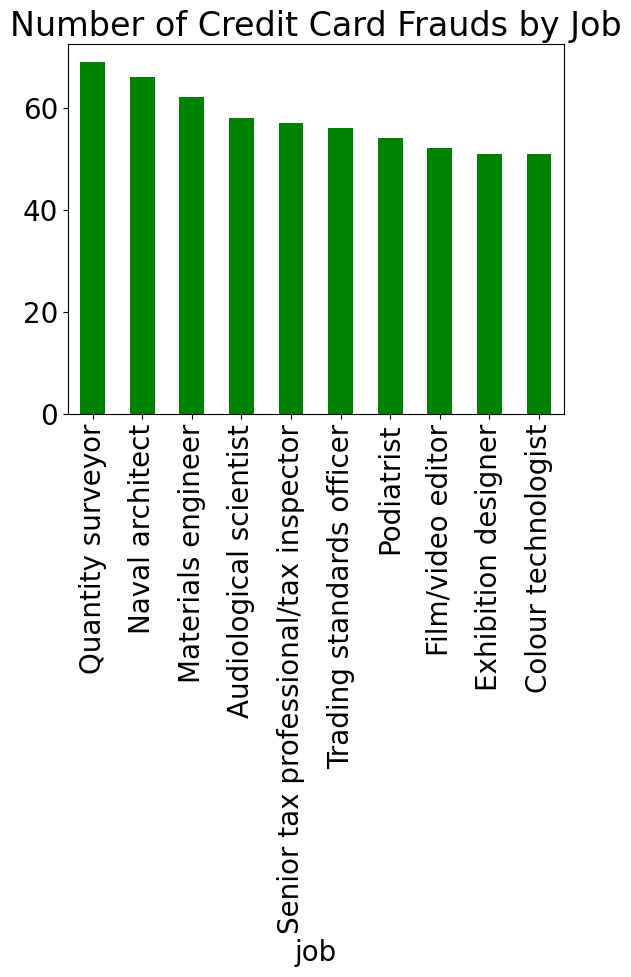

In [19]:
total[total['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color='g')
plt.title("Number of Credit Card Frauds by Job")
plt.show()

In [20]:
del total['is_fraud_cat']
from scipy.stats import norm, skew

In [21]:
testnum= test.select_dtypes(include=np.number)
test[testnum.columns]

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,2.86,29209,33.9659,-80.9355,333497,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,29.84,84002,40.3207,-110.4360,302,1371816873,39.450498,-109.960431,0
2,2,3598215285024754,41.28,11710,40.6729,-73.5365,34496,1371816893,40.495810,-74.196111,0
3,3,3591919803438423,60.05,32780,28.5697,-80.8191,54767,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,3.19,49632,44.2529,-85.0170,1126,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,43.77,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0
555715,555715,3556613125071656,111.84,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0
555716,555716,6011724471098086,86.88,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0
555717,555717,4079773899158,7.99,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0


In [22]:
total.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
dtype: int64

In [23]:
total[testnum.columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   cc_num      int64  
 2   amt         float64
 3   zip         int64  
 4   lat         float64
 5   long        float64
 6   city_pop    int64  
 7   unix_time   int64  
 8   merch_lat   float64
 9   merch_long  float64
 10  is_fraud    int64  
dtypes: float64(5), int64(6)
memory usage: 169.6 MB


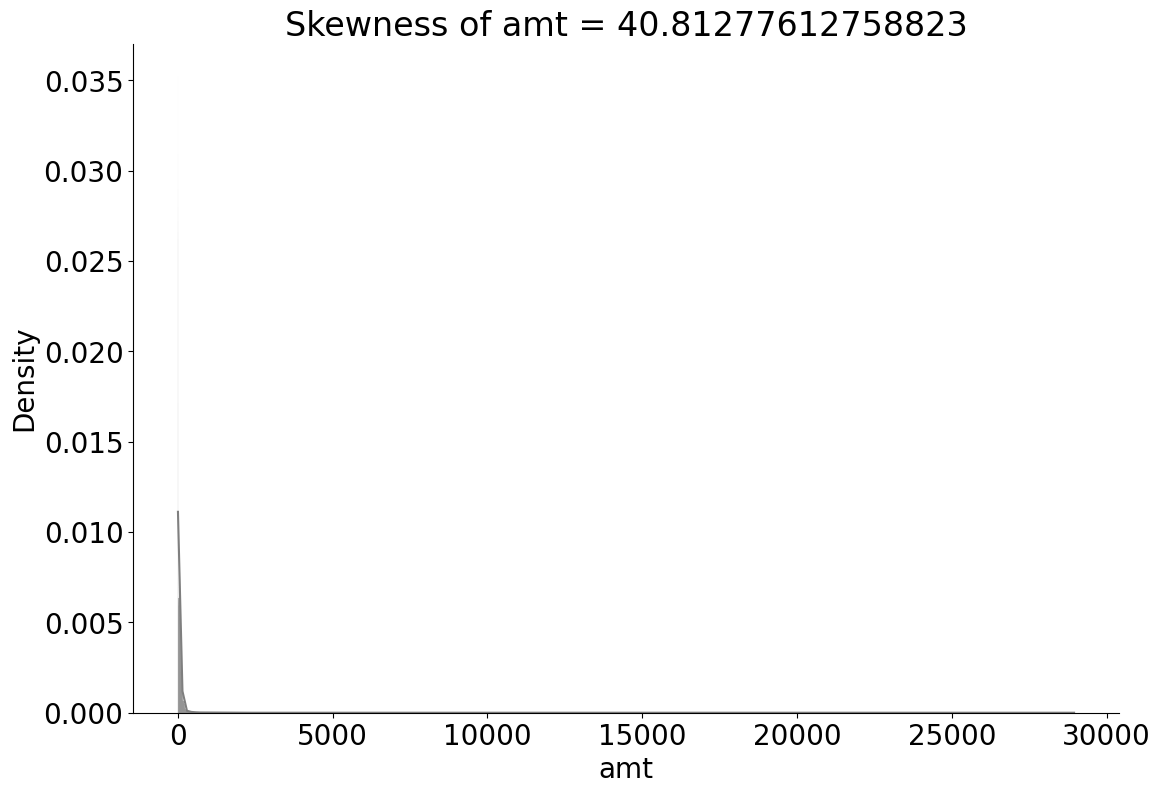

In [24]:
import random
skewness = str(skew(total['amt']))
sns.displot(total['amt'], kde=True, stat='density', color=random.choice(sns.color_palette()), height=8, aspect=1.5)
plt.title("Skewness of amt"+" = "+skewness)
plt.show()

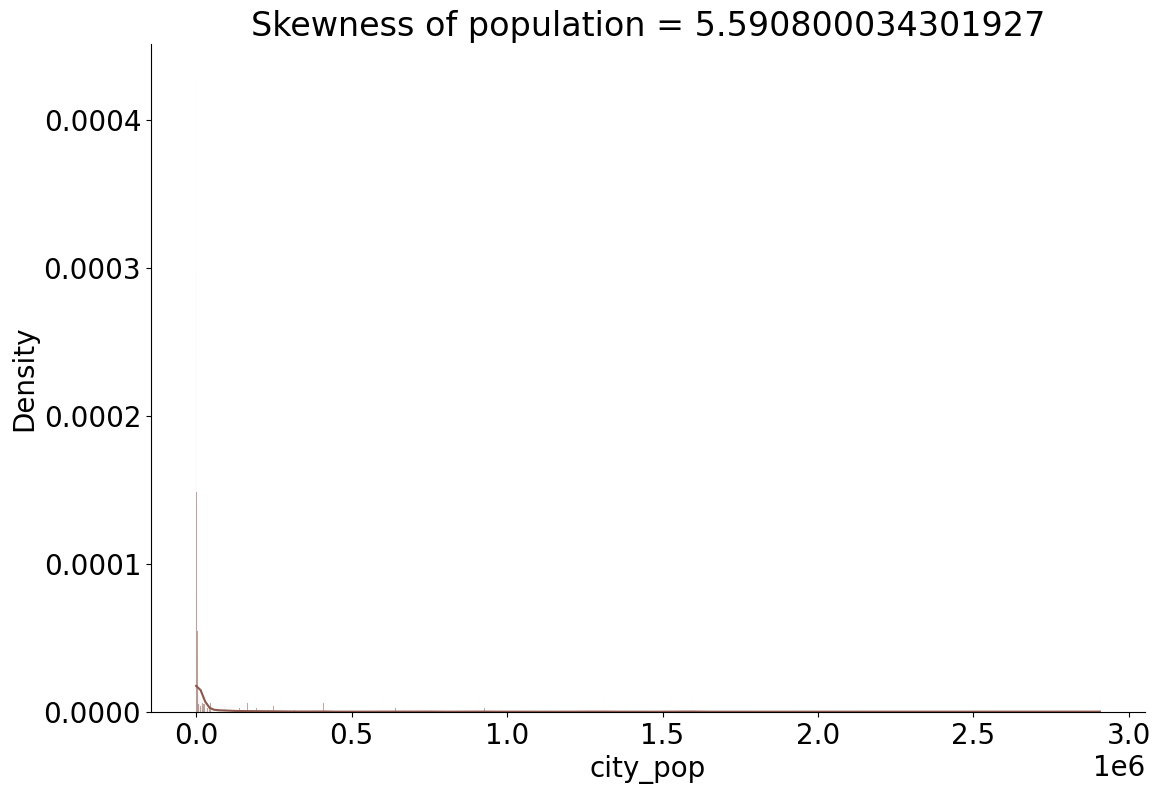

In [25]:
skewness = str(skew(total['city_pop']))

sns.displot(total['city_pop'], kde=True, stat='density', color=random.choice(sns.color_palette()),height=8, aspect=1.5)
plt.title("Skewness of population"+" = "+skewness)
plt.show()

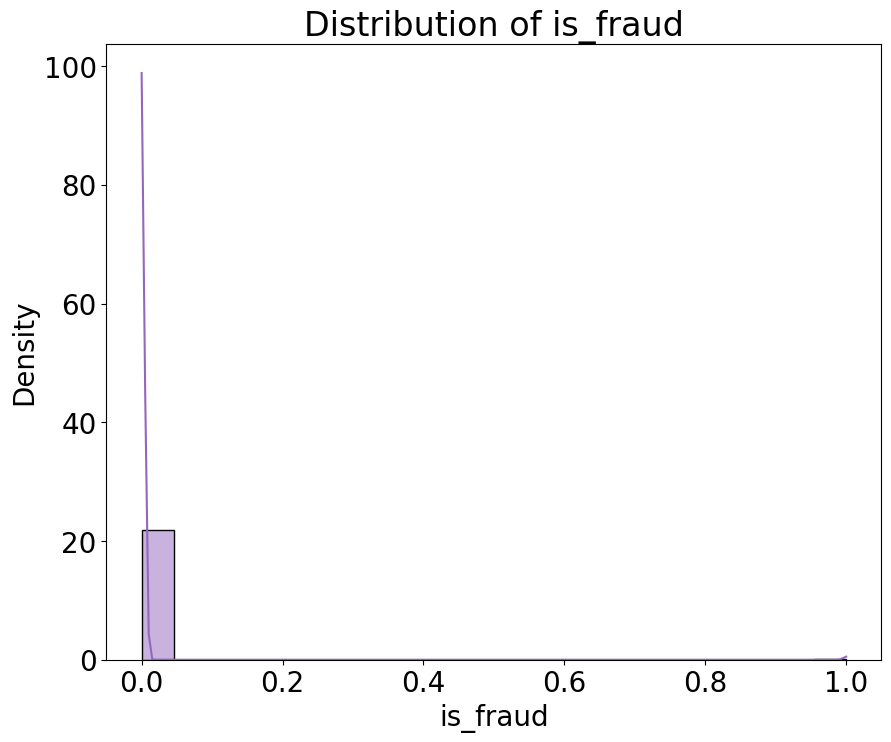

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(total['is_fraud'], kde=True, stat='density', color=random.choice(sns.color_palette()), ax=ax)
plt.title("Distribution of is_fraud")
plt.show()

In [27]:
total.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   city_pop               int64         
 10  job                    object        
 11  dob                    datetime64[ns]
 12  merch_lat              float64       
 13  merch_long             float64       
 14  is_fraud               int64         
 15  trans_date             datetime64[ns]
dtypes: datetime64[ns](3), float64(5), int64(3), object(5)
memory usage: 240.3+ MB


In [28]:
total

,Unnamed: 0,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date
0,0,2020-06-21 12:14:25,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,33.986391,-81.200714,0,2020-06-21
1,1,2020-06-21 12:14:33,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,39.450498,-109.960431,0,2020-06-21
2,2,2020-06-21 12:14:53,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,40.495810,-74.196111,0,2020-06-21
3,3,2020-06-21 12:15:15,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,Set designer,1987-07-25,28.812398,-80.883061,0,2020-06-21
4,4,2020-06-21 12:15:17,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,Furniture designer,1955-07-06,44.959148,-85.884734,0,2020-06-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,entertainment,15.56,M,Hatch,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020-06-21
1296671,1296671,2020-06-21 12:12:19,food_dining,51.70,M,Tuscarora,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020-06-21
1296672,1296672,2020-06-21 12:12:32,food_dining,105.93,M,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020-06-21
1296673,1296673,2020-06-21 12:13:36,food_dining,74.90,M,Manderson,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020-06-21


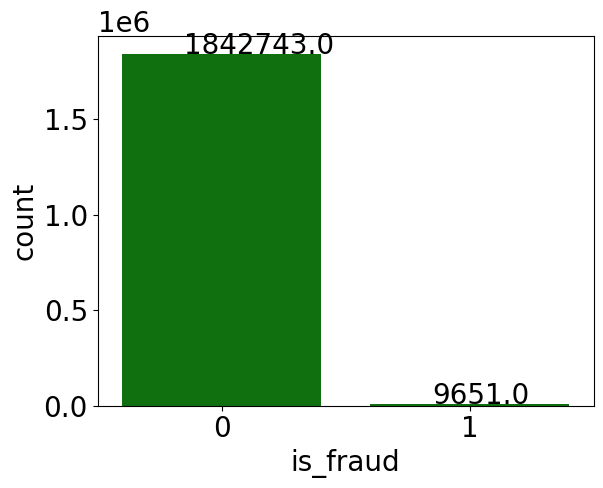

In [29]:
sns.countplot(x="is_fraud", data=total, color='g')

# add annotations to display the count of each category above its respective bar
for p in plt.gca().patches:
    plt.gca().annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()




In [30]:
total['age'] = (pd.to_datetime(total['trans_date']).dt.year - pd.to_datetime(total['dob']).dt.year).astype(float)
print(total['age'].head())

0    52.0
1    30.0
2    50.0
3    33.0
4    65.0
Name: age, dtype: float64


In [31]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   city_pop               int64         
 10  job                    object        
 11  dob                    datetime64[ns]
 12  merch_lat              float64       
 13  merch_long             float64       
 14  is_fraud               int64         
 15  trans_date             datetime64[ns]
 16  age                    float64       
dtypes: datetime64[ns](3), float64(6), int64(3), object(5)
memory usage: 25

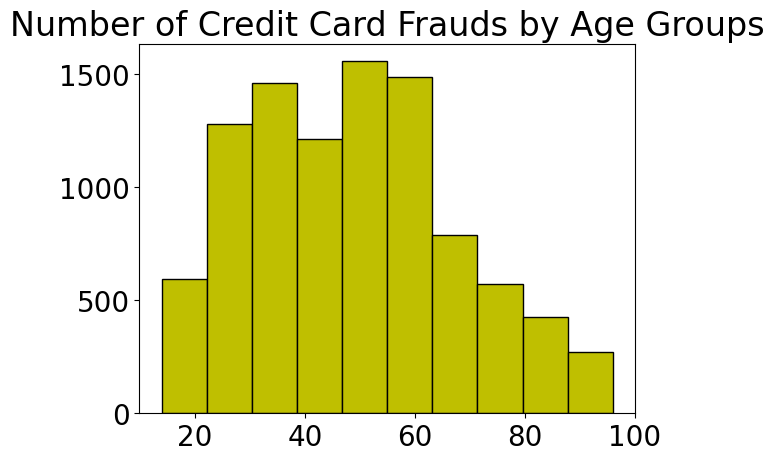

In [32]:
fraud=total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 10, color='y')
plt.title("Number of Credit Card Frauds by Age Groups")
plt.show()

In [33]:
total['trans_month'] = pd.DatetimeIndex(total['trans_date']).month
total['trans_year'] = pd.DatetimeIndex(total['trans_date']).year

In [34]:
total['trans_year']

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
1296670    2020
1296671    2020
1296672    2020
1296673    2020
1296674    2020
Name: trans_year, Length: 1852394, dtype: int32

In [35]:
import calendar
total['Month_name'] = total['trans_month'].apply(lambda x: calendar.month_abbr[x])

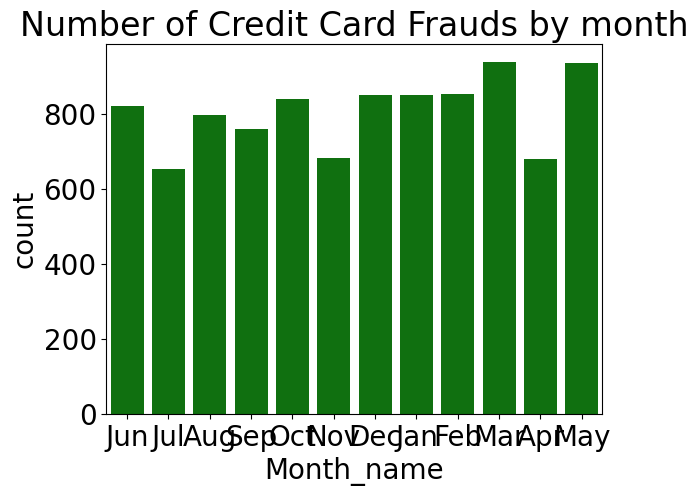

In [36]:
sns.countplot(data=total[total['is_fraud']==1], x='Month_name', color=random.choice(['r', 'g', 'b', 'y', 'm', 'c']))
plt.title("Number of Credit Card Frauds by month")
plt.show()
del total['Month_name']

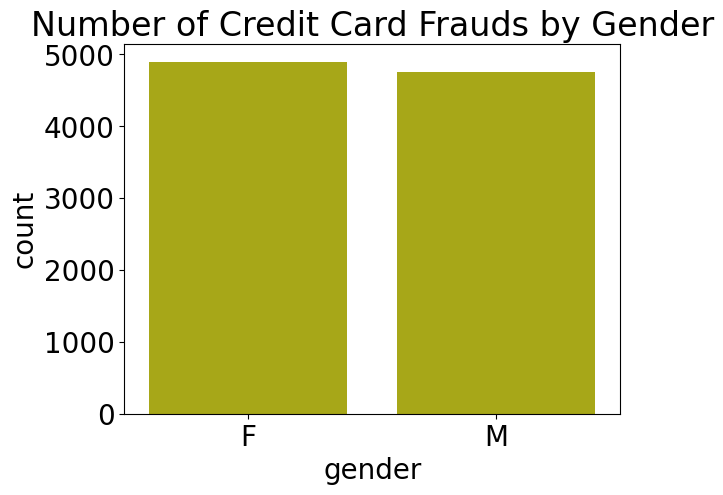

In [37]:
sns.countplot(data=total[total["is_fraud"]==1],x="gender",color=random.choice(['r', 'g', 'b', 'y', 'm', 'c']))
plt.title("Number of Credit Card Frauds by Gender")
plt.show()



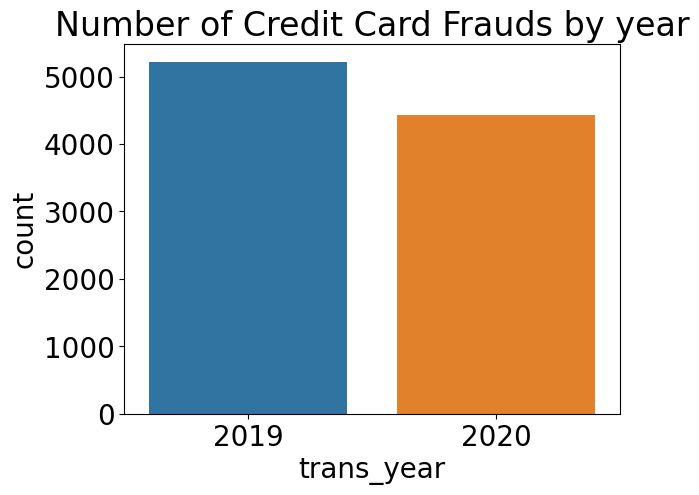

In [38]:
sns.countplot(data=total[total["is_fraud"]==1],x="trans_year")
plt.title("Number of Credit Card Frauds by year")
plt.show()

In [39]:


total['latitudinal_distance'] = abs(round(total['merch_lat']-total['lat'],3))
total['longitudinal_distance'] = abs(round(total['merch_long']-total['long'],3))



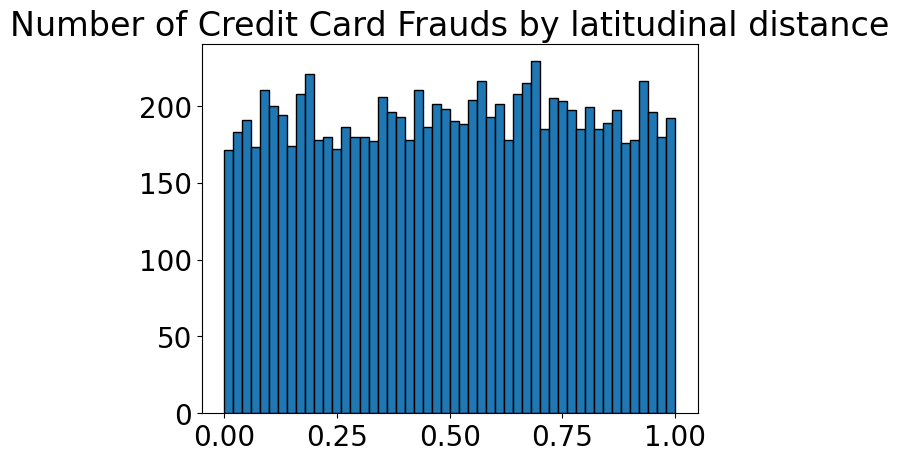

In [40]:


fraud = total[total["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 50)
plt.title("Number of Credit Card Frauds by latitudinal distance")
plt.show()



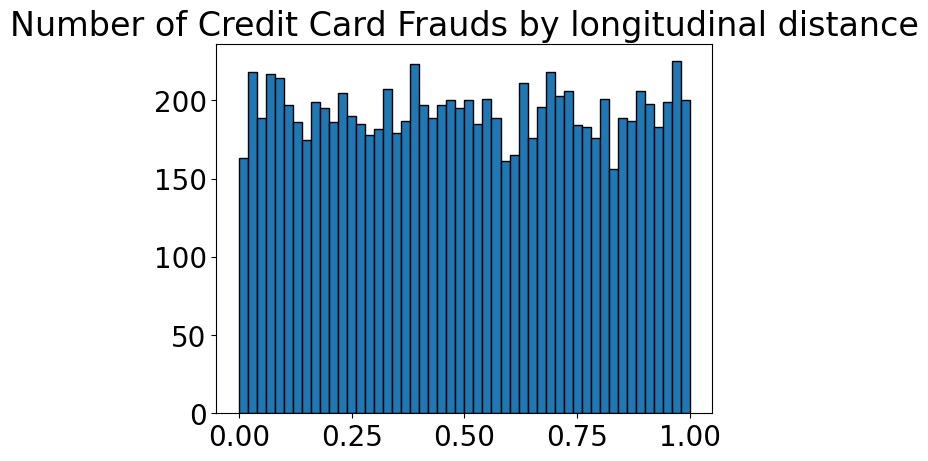

In [41]:
fig, ax = plt.subplots()
ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 50)
plt.title("Number of Credit Card Frauds by longitudinal distance")
plt.show()

In [42]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   category               object        
 3   amt                    float64       
 4   gender                 object        
 5   city                   object        
 6   state                  object        
 7   lat                    float64       
 8   long                   float64       
 9   city_pop               int64         
 10  job                    object        
 11  dob                    datetime64[ns]
 12  merch_lat              float64       
 13  merch_long             float64       
 14  is_fraud               int64         
 15  trans_date             datetime64[ns]
 16  age                    float64       
 17  trans_month            int32         
 18  trans_year             int3

In [43]:
total.gender.value_counts()

gender
F    1014749
M     837645
Name: count, dtype: int64

In [44]:
total.gender=total.gender.apply(lambda x: 1 if x=="M" else 0)
total.gender.value_counts()

gender
0    1014749
1     837645
Name: count, dtype: int64

In [45]:
drop_cols = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
total=total.drop(drop_cols,axis=1)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   category               object 
 2   amt                    float64
 3   gender                 int64  
 4   city_pop               int64  
 5   is_fraud               int64  
 6   age                    float64
 7   trans_month            int32  
 8   trans_year             int32  
 9   latitudinal_distance   float64
 10  longitudinal_distance  float64
dtypes: float64(4), int32(2), int64(4), object(1)
memory usage: 155.5+ MB


In [46]:
total

,Unnamed: 0,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,0,personal_care,2.86,1,333497,0,52.0,6,2020,0.020,0.265
1,1,personal_care,29.84,0,302,0,30.0,6,2020,0.870,0.476
2,2,health_fitness,41.28,0,34496,0,50.0,6,2020,0.177,0.660
3,3,misc_pos,60.05,1,54767,0,33.0,6,2020,0.243,0.064
4,4,travel,3.19,1,1126,0,65.0,6,2020,0.706,0.868
...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,entertainment,15.56,1,258,0,59.0,6,2020,0.876,0.787
1296671,1296671,food_dining,51.70,1,100,0,41.0,6,2020,0.360,0.736
1296672,1296672,food_dining,105.93,1,899,0,53.0,6,2020,0.680,0.688
1296673,1296673,food_dining,74.90,1,1126,0,40.0,6,2020,0.564,0.700


In [47]:
drop_cols = ['city_pop','age']
total=total.drop(drop_cols,axis=1)

In [48]:
drop_cols = ['gender','trans_month','trans_year']
total=total.drop(drop_cols,axis=1)

In [49]:
total = pd.get_dummies(total,columns=['category'],drop_first=True)
total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   amt                      float64
 2   is_fraud                 int64  
 3   latitudinal_distance     float64
 4   longitudinal_distance    float64
 5   category_food_dining     bool   
 6   category_gas_transport   bool   
 7   category_grocery_net     bool   
 8   category_grocery_pos     bool   
 9   category_health_fitness  bool   
 10  category_home            bool   
 11  category_kids_pets       bool   
 12  category_misc_net        bool   
 13  category_misc_pos        bool   
 14  category_personal_care   bool   
 15  category_shopping_net    bool   
 16  category_shopping_pos    bool   
 17  category_travel          bool   
dtypes: bool(13), float64(3), int64(2)
memory usage: 107.8 MB


In [50]:
total.head()

,Unnamed: 0,amt,is_fraud,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2.86,0,0.020,0.265,False,False,False,False,False,False,False,False,False,True,False,False,False
1,1,29.84,0,0.870,0.476,False,False,False,False,False,False,False,False,False,True,False,False,False
2,2,41.28,0,0.177,0.660,False,False,False,False,True,False,False,False,False,False,False,False,False
3,3,60.05,0,0.243,0.064,False,False,False,False,False,False,False,False,True,False,False,False,False
4,4,3.19,0,0.706,0.868,False,False,False,False,False,False,False,False,False,False,False,False,True


In [51]:
bool_cols = total.select_dtypes(include='bool').columns
total[bool_cols] = total[bool_cols].astype('uint8')

In [52]:
total.head()

,Unnamed: 0,amt,is_fraud,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2.86,0,0.020,0.265,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,29.84,0,0.870,0.476,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,41.28,0,0.177,0.660,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,60.05,0,0.243,0.064,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,3.19,0,0.706,0.868,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.utils import resample

In [55]:
df_majority = total[(total['is_fraud']==0)] 
df_minority = total[(total['is_fraud']==1)] 
df_majority.shape,df_minority.shape

((1842743, 18), (9651, 18))

In [56]:
selected_data = total[total['is_fraud'] == 0].sample(n=9651, random_state=42)


In [57]:
selected_data

,Unnamed: 0,amt,is_fraud,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
516733,516733,1.80,0,0.171,0.808,0,0,0,0,0,0,0,0,0,1,0,0,0
455518,455518,114.66,0,0.955,0.374,0,0,0,1,0,0,0,0,0,0,0,0,0
24653,24653,5.66,0,0.287,0.078,0,0,0,0,0,0,0,1,0,0,0,0,0
538193,538193,20.22,0,0.104,0.778,0,0,0,0,0,0,0,0,0,1,0,0,0
1173680,1173680,45.08,0,0.153,0.213,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99122,99122,35.28,0,0.403,0.011,0,0,1,0,0,0,0,0,0,0,0,0,0
1014904,1014904,11.34,0,0.904,0.174,0,0,0,0,0,0,0,1,0,0,0,0,0
250736,250736,72.70,0,0.107,0.416,0,0,0,0,1,0,0,0,0,0,0,0,0
304950,304950,87.46,0,0.238,0.680,0,0,0,0,0,0,1,0,0,0,0,0,0


In [216]:
# upsample minority class
#df_minority_upsampled = resample(df_minority, replace=True,n_samples= 1842743,random_state=42)  
#df_minority_upsampled.shape

(1842743, 18)

In [217]:
df_minority_upsampled

,Unnamed: 0,amt,is_fraud,latitudinal_distance,longitudinal_distance,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
909017,909017,945.40,1,0.408,0.734,0,0,0,0,0,0,0,0,0,0,1,0,0
197591,197591,284.36,1,0.958,0.516,0,0,0,1,0,0,0,0,0,0,0,0,0
557703,557703,1170.79,1,0.817,0.967,0,0,0,0,0,0,0,0,0,0,1,0,0
502525,502525,963.73,1,0.628,0.786,0,0,0,0,0,0,0,0,0,0,1,0,0
609640,609640,1040.08,1,0.807,0.190,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249031,249031,821.37,1,0.764,0.913,0,0,0,0,0,0,0,1,0,0,0,0,0
66060,66060,45.24,1,0.223,0.346,0,0,0,0,0,0,0,0,0,1,0,0,0
76612,76612,1084.51,1,0.593,0.745,0,0,0,0,0,0,0,0,0,0,0,1,0
936383,936383,1039.82,1,0.911,0.272,0,0,0,0,0,0,0,0,0,0,1,0,0


In [77]:
total_upsampled = pd.concat([df_minority, selected_data])
total_upsampled.shape

(19302, 18)

In [78]:
x_cols = list(total_upsampled.columns)
x_cols.remove('is_fraud')
x_cols

['Unnamed: 0',
 'amt',
 'latitudinal_distance',
 'longitudinal_distance',
 'category_food_dining',
 'category_gas_transport',
 'category_grocery_net',
 'category_grocery_pos',
 'category_health_fitness',
 'category_home',
 'category_kids_pets',
 'category_misc_net',
 'category_misc_pos',
 'category_personal_care',
 'category_shopping_net',
 'category_shopping_pos',
 'category_travel']

In [79]:
X = total_upsampled[x_cols]
Y = total_upsampled['is_fraud']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19302 entries, 1685 to 134978
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               19302 non-null  int64  
 1   amt                      19302 non-null  float64
 2   latitudinal_distance     19302 non-null  float64
 3   longitudinal_distance    19302 non-null  float64
 4   category_food_dining     19302 non-null  uint8  
 5   category_gas_transport   19302 non-null  uint8  
 6   category_grocery_net     19302 non-null  uint8  
 7   category_grocery_pos     19302 non-null  uint8  
 8   category_health_fitness  19302 non-null  uint8  
 9   category_home            19302 non-null  uint8  
 10  category_kids_pets       19302 non-null  uint8  
 11  category_misc_net        19302 non-null  uint8  
 12  category_misc_pos        19302 non-null  uint8  
 13  category_personal_care   19302 non-null  uint8  
 14  category_shopping_net  

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [63]:
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train_std, Y_train)

LogisticRegression(solver='liblinear')

In [64]:
feature= pd.DataFrame()
feature['column']= X_train.columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

,column,importance
1,amt,4.080030
5,category_gas_transport,0.845887
7,category_grocery_pos,0.725421
13,category_personal_care,0.555548
10,category_kids_pets,0.519353
12,category_misc_pos,0.473593
6,category_grocery_net,0.428742
16,category_travel,0.398151
8,category_health_fitness,0.391840
4,category_food_dining,0.370050


In [65]:
Logit1=LogisticRegression(solver='liblinear')

Logit1.fit(X_train_std,Y_train)

print("Score of the model with X-train and Y-train is : ", str(round(Logit1.score(X_train,Y_train)*100,2)),"%")
print("Score of the model with X-test and Y-test is : ", str(round(Logit1.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit1.predict(X_test_std)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score of the model with X-train and Y-train is :  52.58 %
Score of the model with X-test and Y-test is :  52.53 %
 Mean absolute error is  0.16698324987048868
 Mean squared  error is  0.16698324987048868
 Median absolute error is  0.0
Accuracy is  83.3 %
F1 score:  83.2 %


T:\Applications\python\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
T:\Applications\python\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


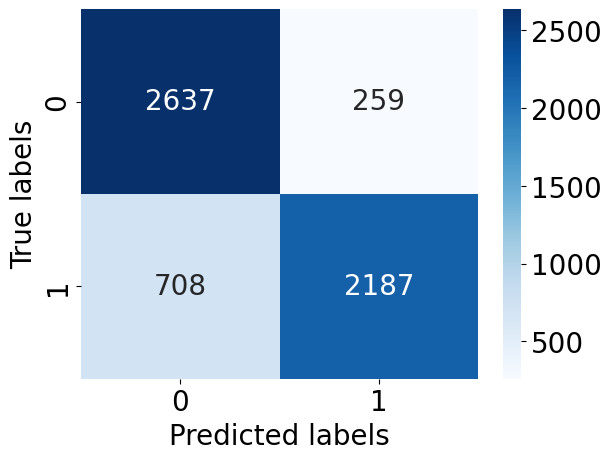

In [66]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [67]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

Unnamed: 0 -  0.02578280411331148
amt -  0.7358531904312698
latitudinal_distance -  0.018126944430202987
longitudinal_distance -  0.024852647946509494
category_food_dining -  0.016975760056291207
category_gas_transport -  0.06968192560197722
category_grocery_net -  0.02475446952117167
category_grocery_pos -  0.00017316340050801675
category_health_fitness -  0.005428991154735909
category_home -  0.016630188447744648
category_kids_pets -  0.005907641392279153
category_misc_net -  0.0032623378021715732
category_misc_pos -  0.015525250025832313
category_personal_care -  0.004324246425202917
category_shopping_net -  0.010725468821737227
category_shopping_pos -  0.00614959311162741
category_travel -  0.01584537731742683


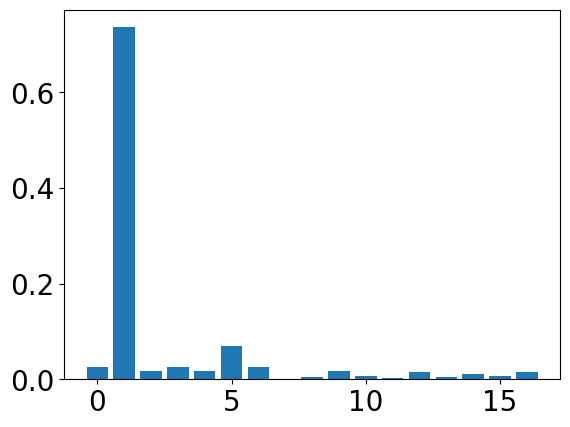

In [68]:
importance = dtc.feature_importances_
for i,v in enumerate(importance):
    print(X_train.columns[int(i)],"- ",v)
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [69]:
print("Score the X-train with Y-train is : ", dtc.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,Y_test))

Y_pred=dtc.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.954584700397168
 Mean absolute error is  0.04541529960283198
 Mean squared  error is  0.04541529960283198
 Median absolute error is  0.0
Accuracy score  0.954584700397168
F1 score:  95.46 %


In [70]:
dtc1 = DecisionTreeClassifier()

params_dtc = {
    'max_depth': [10, 20, 50, 100, 200],
    'min_samples_leaf': [10, 20, 50, 100, 200],
    'min_samples_split' : [10, 20, 50, 100, 200],
    'criterion': ["gini", "entropy"]
} 

halving_random_search=HalvingRandomSearchCV(estimator=dtc1,param_distributions = params_dtc,cv=5)
halving_random_search.fit(X_train,Y_train)
print(halving_random_search.best_params_)

T:\Applications\python\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 250 is smaller than n_iter=675. Running 250 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'gini'}


In [71]:
print(halving_random_search.best_params_)

{'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 20, 'criterion': 'gini'}


In [73]:
dtc2 = DecisionTreeClassifier(min_samples_split= 100, min_samples_leaf= 20, max_depth= 200, criterion= 'gini')
dtc2.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=200, min_samples_leaf=20,
                       min_samples_split=100)

In [74]:
print("Score the X-train with Y-train is : ", dtc2.score(X_train,Y_train))
print("Score the X-test  with Y-test  is : ", dtc2.score(X_test,Y_test))

Y_pred=dtc2.predict(X_test)

print( " Mean absolute error is ", mean_absolute_error(Y_test,Y_pred))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy score " , accuracy_score(Y_test,Y_pred))
print("F1 score: ", round(f1_score(Y_test, Y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  0.9639552956849974
Score the X-test  with Y-test  is :  0.961837333793818
 Mean absolute error is  0.03816266620618201
 Mean squared  error is  0.03816266620618201
 Median absolute error is  0.0
Accuracy score  0.961837333793818
F1 score:  96.18 %


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [82]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [83]:
predictions = rf.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:",accuracy*100)

Accuracy: 96.9780694180625


In [86]:
# Increase the number of trees in the forest to 100
rf = RandomForestClassifier(n_estimators=100)

In [90]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the top 10 most important features
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, Y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the random forest on the selected features
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_selected,Y_train)

RandomForestClassifier()

In [92]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Combine random forest with logistic regression and Naive Bayes
rf = RandomForestClassifier(n_estimators=100)
lr = LogisticRegression()
nb = GaussianNB()
ensemble = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('nb', nb)])
ensemble.fit(X_train,Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('lr', LogisticRegression()),
                             ('nb', GaussianNB())])

In [94]:
from sklearn.preprocessing import StandardScaler

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the random forest on the scaled features
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_scaled,Y_train)

RandomForestClassifier()

In [96]:
from sklearn.ensemble import BaggingClassifier

# Use bagging to reduce overfitting
rf = RandomForestClassifier(n_estimators=100)
bagging = BaggingClassifier(rf, max_samples=0.5, max_features=0.5)
bagging.fit(X_train,Y_train)

BaggingClassifier(estimator=RandomForestClassifier(), max_features=0.5,
                  max_samples=0.5)

In [97]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:",accuracy*100)

Accuracy: 96.9780694180625
